In [252]:
import numpy as np
import pandas as pd
import pickle
import xgboost as xgb
from xgboost import plot_importance
from sklearn.model_selection import train_test_split


data = pd.read_csv('./final_data.csv')

c1 = 0
c2 = 0
c3 = 0
data_size = 1682

threshod1 = 0.008
threshod2 = 0.0025

for i in range(data_size):
    #print(i)
    data.loc[i, 'bug_num'] = data.loc[i, 'bug_num'] * 1.0 / data.loc[i, 'LOC']
    if data.loc[i, 'bug_num'] >= threshod1:
        c1 += 1
    elif data.loc[i, 'bug_num'] >= threshod2:
        c2 += 1
    else:
        c3 += 1
print(c1)       
print(c2) 
print(c3) 

def foo3(x):
    if x >= threshod1:
        return 2
    if x >= threshod2:
        return 1
    return 0

def foo2(x):
    if x >= threshod1:
        return 1
    return 0

data['bug_num'] = data['bug_num'].map(lambda x: foo2(x))



614
453
615


In [253]:
'''
created_at,
updated_at,
size, #
stargazers_count,
watchers_count, #
forks_count, #
network_count, #
subscribers_count, #
followers, #
public_repos, #
created_at,
contributions, #
author_id,
LOC, #
Add, #
Delete, #
Files, #
bug_num  #
'''

feature_columns = [
    'size',
    'watchers_count',
    'forks_count',
    'network_count',
    'subscribers_count',
    
    'followers',
    'public_repos',
    'contributions',
    #'LOC',
    #'Add',
    #'Delete',
    #'Files',
]

target_column = 'bug_num'

train, test = train_test_split(data, test_size=0.15, random_state=42)

xgtrain = xgb.DMatrix(train[feature_columns].values, train[target_column].values)
xgtest = xgb.DMatrix(test[feature_columns].values, test[target_column].values)



print("the train size is {}".format(len(train[target_column].values)))
print("the test size is {}".format(len(test[target_column].values)))

params = {
    'booster': 'gbtree',
    'objective': 'multi:softmax',
    'num_class': 2,
    'gamma': 0.1,
    'max_depth': 6,
    'lambda': 2,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'min_child_weight': 2,
    'silent': 1,
    'eta': 0.1,
    'seed': 111,
    'nthread': 4,
}

# build the model
num_round = 500
bst = xgb.train(params, xgtrain, num_round)



the train size is 1429
the test size is 253
[19:11:01] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:11:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [255]:

project_index = project_index3
# prediction and check the accuracy
preds = bst.predict(xgtest)
labels = xgtest.get_label()

match = 0.0
high_risk_match = 0.0
high_risk_count = 0

#project_match = 0
#project_count = 0

high_pred = 1

for i in range(len(preds)):
    # check high risk
    if preds[i] == high_pred:
        high_risk_count += 1
        
    
        
    if preds[i] == labels[i]:
        match += 1
        if preds[i] == high_pred:
            high_risk_match += 1
    
        
# acc
acc = match / len(preds) * 100.0
print("accuracy rate is {}".format(acc))

# high risk
print(high_risk_count)
print(high_risk_match)
print()
high_risk_acc = high_risk_match / high_risk_count * 100.0
nature_ratio = c1 / data_size

print("high risk accuracy rate is {}".format(high_risk_acc))

print(c1/data_size * 1.0)


accuracy rate is 69.1699604743083
66
37.0

high risk accuracy rate is 56.060606060606055
0.36504161712247324


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

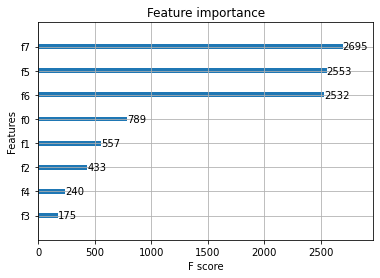

In [226]:
# data analysis
plot_importance(bst, importance_type ='weight')

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

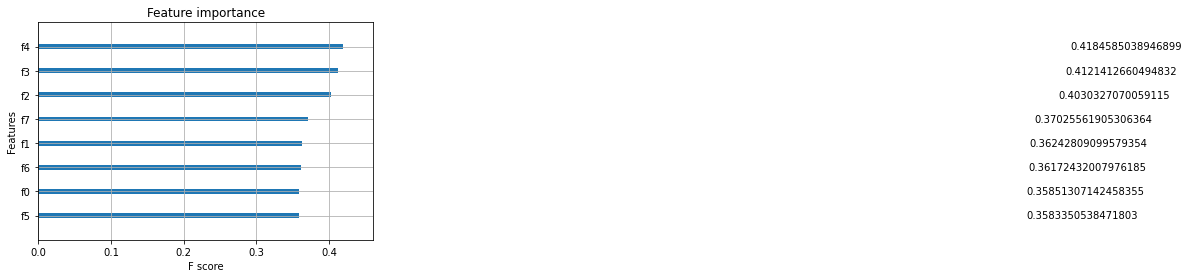

In [230]:
plot_importance(bst, importance_type ='gain')